# Métodos sem malha

## Dependências

In [2]:
%matplotlib notebook

import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

## Gaussiana com raio
$$
w = 
\begin{cases}
\dfrac{{e^{-({\frac{|d|}c})^2}} - {e^{-({\frac r c})^2}}}{1-{e^{-({\frac{r}c})^2}}}, d<r
\\
0, d > r
\end{cases}
$$

In [3]:
def gaussian_with_radius(dist,r):
    c=100
    if la.norm(dist) <= r:
        exp1 = np.exp(-(la.norm(dist)/c)**2)
        exp2 = np.exp(-(r/c)**2)
        weight = ( exp1 - exp2 )/(1-exp2)
    else:
        weight = 0
    return weight

## Pesos $W$

In [4]:
def W(data,point,r):
    W=[]
    for index,row in enumerate(data):
        d2d = row[0:2]
        leftZeroes = np.zeros([1,index])
        rightZeroes = np.zeros([1,len(data) - index - 1])
        weight = gaussian_with_radius(np.subtract(d2d,point),r)
        newRow = np.concatenate([leftZeroes,[[weight]],rightZeroes],axis=1)[0]
        W.append(newRow)
    return W

## Matriz de Base $P$

In [50]:
def create_base(base,data):
    P=[]
    for dat in data:
        row = []
        for b in base:
            exec("x=%s"%dat[0])
            exec("y=%s"%dat[1])
            row.append(eval(b))
        P.append(row)
    return P

## Dados
dados de exemplo: $z = 2x+y^2-xy$

In [51]:
data = [
    [0.520559131078683, 0.062408758274352105, 1.0125256662877162],
    [0.447711576862026, 0.7680861842132574, 1.14149846340328],
    [0.6928072377730861, 0.8192031431762375, 1.4891583985370405],
    [0.16791353130182318, 0.36344468640933736, 0.4068918219549523],
    [0.42633701962624004, 0.1423466043933539, 0.8122489679638201],
    [0.3928812775185744, 0.8308615441039886, 1.1496635156193826],
    [0.8774760430204951, 0.6754122773672129, 1.618475737907712],
    [0.11154008787913916, 0.44871554861818586, 0.37437604760438925],
    [0.9753387832461635, 0.19225053054578867, 1.8001284344465054],
    [0.47016443282445786, 0.9384985267007433, 1.3798597227555374],
    [0.9827866235704859, 0.020709609407733476, 1.9456490079575026],
    [0.6342449242584626, 0.9146502818399507, 1.5249626878582656],
    [0.9966107320409124, 0.780033531403195, 1.8242839854469677],
    [0.34042822889549673, 0.4758376538526644, 0.7452893608721505],
    [0.781028820398589, 0.6373060739643224, 1.4704622615277858],
    [0.7915660098236119, 0.19259682552009116, 1.4677724561660073],
    [0.3011828746881986, 0.8125033388889318, 1.0178153337817315],
    [0.13635614275310148, 0.07406366364688477, 0.2680986762859495],
    [0.7755524852377811, 0.7571513121840037, 1.5371724981521693],
    [0.6014962393970392, 0.17247219712168527, 1.1289977596048213],
    [0.983512141205877, 0.046643433336269524, 1.923325509291401],
    [0.9457223521238475, 0.1105734642448607, 1.7990993985546726],
    [0.27700045604513257, 0.7879187675102265, 0.9565630383582477],
    [0.21403247556229388, 0.6866359452224741, 0.7525714812301264],
    [0.36450002649463575, 0.8120603161504323, 1.0924460033035366],
    [0.6375243582087874, 0.5226248549676629, 1.2149993802003256],
    [0.1961285240354409, 0.9743547252089736, 1.1505254244657428],
    [0.5384762558560108, 0.5540905866337962, 1.0856042654125788],
    [0.9083569968831122, 0.8235214615593399, 1.7468501097242228],
    [0.7933478542348692, 0.6170448473157697, 1.4779088464840315],
    [0.07089412273970175, 0.41284313386566984, 0.282959546854915],
    [0.12718693577409423, 0.39029147244078677, 0.35706132856968287],
    [0.22067483743169847, 0.7851294859267819, 0.8845196628653241],
    [0.36604046894464437, 0.9442347564361822, 1.278032080111653],
    [0.9184840224546367, 0.20440247363596475, 1.6910080099529359],
    [0.5556850967690865, 0.36456829636183674, 1.0416950672075769],
    [0.1244674897915109, 0.19324957117311237, 0.2622270873144104],
    [0.4302489842848971, 0.733129655069983, 1.082548770269829],
    [0.2990781759020218, 0.2787240987732763, 0.5924831799999722],
    [0.43966991787666565, 0.9613008221850753, 1.3807840529421498],
    [0.13233406522374158, 0.008436633921491965, 0.2636228531757729],
    [0.5781712659360464, 0.7723094413662243, 1.3062772776864315],
    [0.3371369920768239, 0.23465200699171873, 0.6502256767169114],
    [0.6517902048130083, 0.32996066389449563, 1.1973893206436834],
    [0.8357819654548257, 0.8189778106320177, 1.657801700983347],
    [0.7634961495379937, 0.6091476885654385, 1.4329712908409227],
    [0.6640597261831243, 0.6289174935041623, 1.3060178874736557],
    [0.4383658196566186, 0.8947220299235726, 1.285043594131515],
    [0.4474844273272285, 0.55244162089631, 0.9529515767944882],
    [0.15434735908178765, 0.44689679683409667, 0.4394341248106981]
];

base = ["1","x","x**2","y","y**2","x*y"];
Dbase = ["0","0","2","0","2","0"];



## Coeficientes $\varphi$
$$
B(x) = P^TW(x)\\
A(x) = B(x)P = P^TW(x)P\\
\varphi^T(x)=p^TA^{-1}(x)B(x)
$$

In [52]:
class LittleDet(Exception):
    def __init__(self, m):
        self.message = m
    def __str__(self):
        return self.message

def coefficients(data,P, x,r,base):
    B = np.matmul(np.transpose(P),W(data,x,r))
    A = np.matmul(B,P)
    det = la.det(A)
    p = create_base(base,[x])
    if(abs(det) < 1e-6):
        raise LittleDet("determinante muito pequeno!")
    else:
        AB= np.matmul(la.inv(A),B)
    return np.matmul(p,AB)
        


## Raio mínimo $R$
parâmetros:
 - `data`: conjunto de dados
 - `points`: pontos de referência
 - `m`: quantidade de pontos no suporte

In [53]:
def get_radius(data,point,m):
    distances = []
    for dat in data:
        dif = np.subtract(point,dat[0:2])
        dist = la.norm(dif)
        distances.append(dist)
    distances = sorted(distances);
    return distances[m]

## Função de aproximação $ũ$

In [54]:
def approx(data,base,point):
    m = len(base);
    while True:
        try:
            r = get_radius(data,point,m)
            P = create_base(base,data)
            c  = coefficients(data,P,point,r,base)
            u=np.array([z for x,y,z  in data])
            break;
        except LittleDet:
            m+=1;
    return np.matmul(c,u);


## Execução

<IPython.core.display.Javascript object>


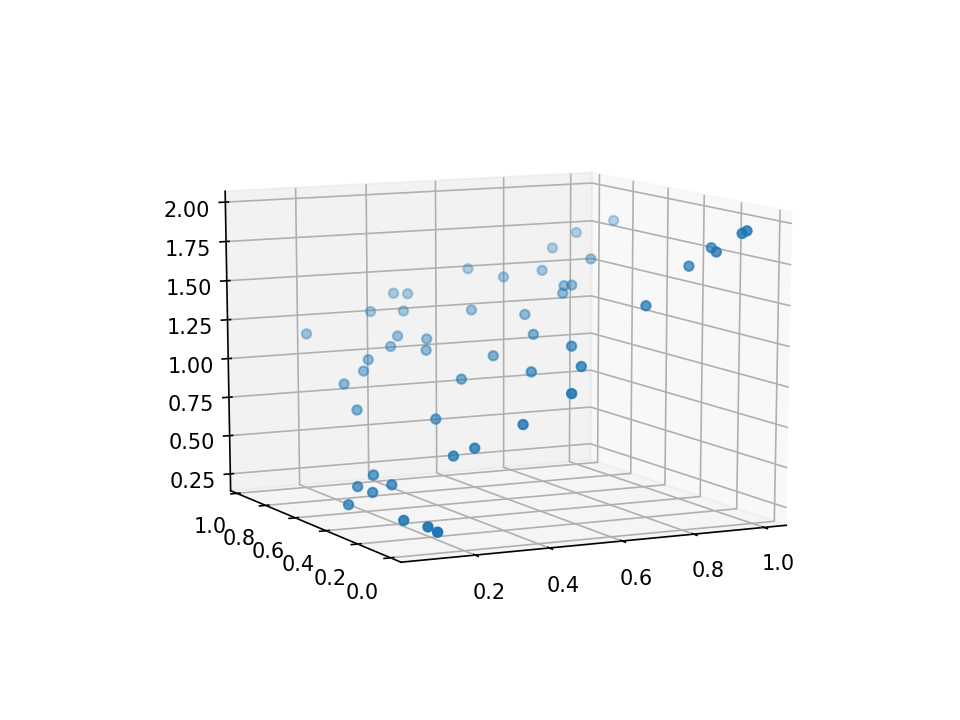

<IPython.core.display.Javascript object>


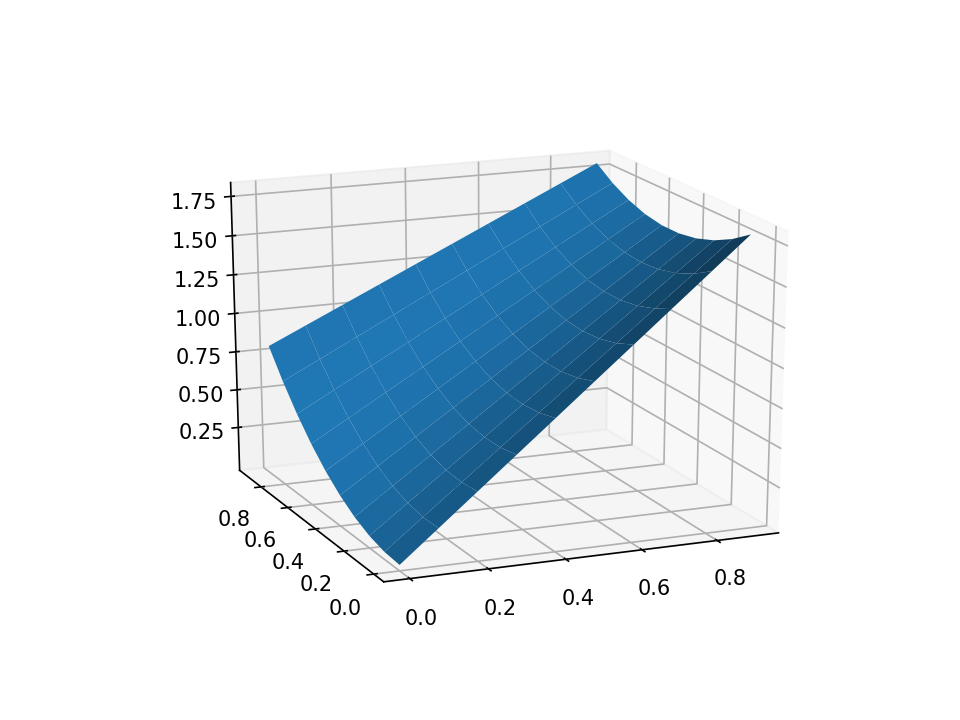

In [55]:
xs = [x for x,y,z in data]
ys = [y for x,y,z in data]
zs = [z for x,y,z in data]

fig = plt.figure("dados")

data_plot = fig.add_subplot(111, projection='3d')
data_plot.scatter(xs,ys,zs)


fig = plt.figure("aproximação")
xs = np.arange(0,1,0.1)
ys = np.arange(0,1,0.1)
X, Y = np.meshgrid(xs, ys)

zs = np.array([ approx(data,base,[x,y]) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z=zs.reshape(X.shape)


mesh_plot = fig.add_subplot(111, projection='3d')
mesh_plot.plot_surface(X,Y,Z)

## Método da colocação
$$
\begin{aligned}
(\mathcal L \varphi)&*&\mathbf u &= &\mathbf b\\
\left[
\begin{matrix}
\mathcal L \varphi_1(x_1) & \mathcal L \varphi_2(x_1) & \mathcal L \varphi_3(x_1) & \dots & \mathcal L \varphi_n(x_1)\\
\mathcal L \varphi_1(x_2) & \mathcal L \varphi_2(x_2) & \mathcal L \varphi_3(x_2) & \dots & \mathcal L \varphi_n(x_2)\\
\mathcal L \varphi_1(x_3) & \mathcal L \varphi_2(x_3) & \mathcal L \varphi_3(x_3) & \dots & \mathcal L \varphi_n(x_3)\\
\vdots\\
\mathcal L \varphi_1(x_n) & \mathcal L \varphi_2(x_n) & \mathcal L \varphi_3(x_n) & \dots & \mathcal L \varphi_n(x_n)\\
\end{matrix}
\right]&*
&\left[
\begin{matrix}
u(x_1)\\ u(x_2) \\ u(x_3) \\ \vdots \\ u(x_n)
\end{matrix}
\right] &=
&\left[
\begin{matrix}
b(x_1)\\ b(x_2) \\ b(x_3) \\ \vdots \\ b(x_n)
\end{matrix}
\right]
\end{aligned}
$$